<a href="https://colab.research.google.com/github/davidmiheev/aoc-2024/blob/main/advent_of_code_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advent of Code 2024

## Day 1: Historian Hysteria

In [64]:
with open('day 1/input.txt') as f:
    lines = f.readlines()

In [65]:
def get_left_and_right_lists(lines):
    left, right = [], []
    for line in lines:
        l, r = line[:-1].split('   ')
        left.append(int(l))
        right.append(int(r))

    return left, right

left, right = get_left_and_right_lists(lines)

In [66]:
total_dist = sum(abs(id2 - id1) for id1, id2 in zip(sorted(left), sorted(right)))
print(f'1) Total distance between left and right lists: {total_dist}')

1) Total distance between left and right lists: 2000468


In [67]:
from collections import Counter

cnt_r = Counter(right)
similarity_score = sum(id1 * cnt_r[id1] for id1 in left)
print(f'2) Similarity Score between the left and the right lists: {similarity_score}')

2) Similarity Score between the left and the right lists: 18567089


## Day 2: Red-Nosed Reports

In [68]:
with open('day 2/input.txt') as f:
    lines = f.readlines()

In [69]:
def get_reports(lines):
    reports = []
    for line in lines:
        reports.append(line[:-1].split(' '))

    return reports

reports = get_reports(lines)
reports[:10]

[['19', '21', '24', '27', '24'],
 ['85', '87', '89', '92', '93', '96', '98', '98'],
 ['2', '5', '6', '7', '8', '12'],
 ['63', '66', '69', '72', '75', '82'],
 ['18', '21', '23', '26', '28', '26', '27', '28'],
 ['16', '19', '21', '19', '20', '22', '23', '22'],
 ['37', '39', '37', '38', '41', '42', '44', '44'],
 ['18', '20', '17', '20', '24'],
 ['50', '51', '54', '53', '58'],
 ['73', '76', '77', '80', '83', '83', '84', '85']]

In [70]:
def number_of_safe(reports):
    safe_cnt = 0
    for report in reports:
        if all(1 <= int(n) - int(p) <= 3 for p, n in zip(report, report[1:])):
            safe_cnt += 1
        if all(-3 <= int(n) - int(p) <= -1 for p, n in zip(report, report[1:])):
            safe_cnt += 1
    
    return safe_cnt

print(f'1) Number of Safe Reports is {number_of_safe(reports)}')

1) Number of Safe Reports is 407


In [71]:
def check(report, l, r):
    x = [l <= int(n) - int(p) <= r for p, n in zip(report, report[1:])]
    if sum(x) == len(report) - 1:
        return True
    i = x.index(False)
    if i == len(report) - 2:
        return True
    report_1, report_2 = report[:i] + report[i + 1:], report[:i + 1] + report[i + 2:]
    if all(l <= int(n) - int(p) <= r for p, n in zip(report_1, report_1[1:])):
        return True
    if all(l <= int(n) - int(p) <= r for p, n in zip(report_2, report_2[1:])):
        return True
    return False

In [72]:
def dampener_number_of_safe(reports):
    safe_cnt = 0
    for report in reports:
        if check(report, 1, 3):
            safe_cnt += 1
            continue
        if check(report, -3, -1):
            safe_cnt += 1
    
    return safe_cnt

print(f'2) Number of Safe Reports with the Problem Dampener is {dampener_number_of_safe(reports)}')

2) Number of Safe Reports with the Problem Dampener is 459


## Day 3: Mull It Over

In [73]:
with open('day 3/input.txt') as f:
    lines = f.readlines()

len(lines)

6

In [74]:
import re

def execute_all_mul_instructions(lines):
    res = 0
    for line in lines:
        for m in re.finditer('mul\([0-9]{1,3},[0-9]{1,3}\)', line):
            a, b = m.group()[4:-1].split(',')
            a, b = int(a), int(b)
            res += a * b
    
    return res

print(f'1) Sum of the results of all multiplications is {execute_all_mul_instructions(lines)}')

1) Sum of the results of all multiplications is 168539636


<>:6: SyntaxWarning: invalid escape sequence '\('
<>:6: SyntaxWarning: invalid escape sequence '\('
/tmp/ipykernel_4141/2328622200.py:6: SyntaxWarning: invalid escape sequence '\('
  for m in re.finditer('mul\([0-9]{1,3},[0-9]{1,3}\)', line):


In [75]:
def execute_do_dont_mul(lines):
    res = 0
    do = True
    for line in lines:
        for m in re.finditer("do\(\)|don't\(\)|mul\([0-9]{1,3},[0-9]{1,3}\)", line):
            if m.group() == 'do()':
                do = True
                continue
            if m.group() == 'don\'t()':
                do = False
                continue
            if not do:
                continue
            a, b = m.group()[4:-1].split(',')
            a, b = int(a), int(b)
            res += a * b
    
    return res

print(f'2) Sum of the results of all enabled multiplications is {execute_do_dont_mul(lines)}')

2) Sum of the results of all enabled multiplications is 97529391


<>:5: SyntaxWarning: invalid escape sequence '\('
<>:5: SyntaxWarning: invalid escape sequence '\('
/tmp/ipykernel_4141/1675103804.py:5: SyntaxWarning: invalid escape sequence '\('
  for m in re.finditer("do\(\)|don't\(\)|mul\([0-9]{1,3},[0-9]{1,3}\)", line):


## Day 4: Ceres Search

In [76]:
with open('day 4/input.txt') as f:
    lines = f.readlines()

len(lines), len(lines[0]) - 1

(140, 140)

In [77]:
import re

def xmas_search(lines):
    lines = [list(line[:-1]) for line in lines]
    res = 0
    for line in lines:
        for m in re.finditer('XMAS', ''.join(line)):
            res += 1
        for m in re.finditer('SAMX', ''.join(line)):
            res += 1

    for i in range(-len(lines) + 1, len(lines)):
        diagonal = []
        for j in range(len(lines) - abs(i)):
            if i < 0:
                diagonal.append(lines[j + abs(i)][j])
            else:
                diagonal.append(lines[j][j + i])

        for m in re.finditer('XMAS', ''.join(diagonal)):
            res += 1
        for m in re.finditer('SAMX', ''.join(diagonal)):
            res += 1

    for i in range(len(lines)):
        diagonal = []
        for j in range(i + 1):
            diagonal.append(lines[i - j][j])

        for m in re.finditer('XMAS', ''.join(diagonal)):
            res += 1
        for m in re.finditer('SAMX', ''.join(diagonal)):
            res += 1


    for i in range(1, len(lines)):
        diagonal = []
        for j in range(len(lines) - i):
            diagonal.append(lines[-j - 1][j + i])

        for m in re.finditer('XMAS', ''.join(diagonal)):
            res += 1
        for m in re.finditer('SAMX', ''.join(diagonal)):
            res += 1

    for vertical in zip(*lines):
        for m in re.finditer('XMAS', ''.join(vertical)):
            res += 1
        for m in re.finditer('SAMX', ''.join(vertical)):
            res += 1
    
    return res

print(f'1) Number of XMAS appearances is {xmas_search(lines)}')

1) Number of XMAS appearances is 2718


In [78]:
def solve_x_mas_puzzle(lines):
    res = 0
    for i in range(len(lines) - 2):
        for j in range(len(lines[0]) - 3):
            if ''.join([lines[i][j], lines[i + 1][j + 1], lines[i + 2][j + 2]]) in ('MAS', 'SAM') \
                and ''.join([lines[i][j + 2], lines[i + 1][j + 1], lines[i + 2][j]]) in ('MAS', 'SAM'):
                res += 1
    
    return res

print(f'2) Number of X-MAS appearances is {solve_x_mas_puzzle(lines)}')

2) Number of X-MAS appearances is 2046


## Day 5: Print Queue

In [213]:
with open('day 5/input.txt') as f:
    lines = f.readlines()

len(lines)

1374

In [214]:
def get_rules_and_updates(lines):
    rules = []
    updates = []
    mode = 0
    for line in lines:
        if line == '\n':
            mode = 1
            continue
        if mode == 0:
            rules.append(line[:-1].split('|'))
        if mode == 1:
            updates.append(line[:-1].split(','))
    
    return rules, updates

rules, updates = get_rules_and_updates(lines)
rules[:5], updates[:2]

([['95', '51'], ['92', '45'], ['92', '39'], ['55', '51'], ['55', '91']],
 [['37',
   '45',
   '96',
   '69',
   '95',
   '88',
   '81',
   '24',
   '52',
   '86',
   '18',
   '55',
   '68',
   '76',
   '61',
   '57',
   '58',
   '23',
   '62',
   '91',
   '54'],
  ['97', '71', '66', '28', '95', '86', '18', '76', '61', '14', '57']])

In [81]:
from collections import defaultdict

def fetch_correctly_ordered(updates, rules):
    res = 0
    for update in updates:
        inds = defaultdict(int)
        for i, e in enumerate(update):
            inds[int(e)] = i


        if all(inds.get(int(a), -1) < inds.get(int(b), 100) for a, b in rules):
            res += int(update[len(update) // 2])
    
    return res

print(f'1) Sum of the middle page number from correctly-ordered updates is {fetch_correctly_ordered(updates, rules)}')

1) Sum of the middle page number from correctly-ordered updates is 6260


In [217]:
def handle_incorrectly_ordered(updates, rules):    
    res = 0
    for update in updates:
        inds = defaultdict(int)
        prev_t, t = -1, 0
        for i, e in enumerate(update):
            inds[int(e)] = i

        while prev_t != t:
            prev_t = t
            for a, b in rules:
                if inds.get(int(a), -1) > inds.get(int(b), 100):
                    t += 1
                    i, j = inds.get(int(a), -1), inds.get(int(b), 100)
                    update[i], update[j] = update[j], update[i]
                    inds[int(a)], inds[int(b)] = inds[int(b)], inds[int(a)]
                    break

        if t:
            res += int(update[len(update) // 2])
        
    return res

print(f'2) Sum of the middle page number from incorrectly-ordered updates after ordering is {handle_incorrectly_ordered(updates, rules)}')

2) Sum of the middle page number from incorrectly-ordered updates after ordering is 5346


## Day 6: Guard Gallivant

In [83]:
with open('day 6/input.txt') as f:
    lines = f.readlines()

m, n = len(lines), len(lines[0]) - 1
m, n

(130, 130)

In [84]:
def get_init_guard_pos(lines):
    init_pos, init_dir = None, 0

    for i, line in enumerate(lines):
        for j, e in enumerate(line[:-1]):
            if e == '^':
                init_pos = (i, j)
                break

    return init_pos, init_dir

init_pos, init_dir = get_init_guard_pos(lines)
init_pos, init_dir

((79, 87), 0)

In [85]:
def simulate_route(lines, cur_pos, cur_dir):
    moves = [(-1, 0), (0, 1), (1, 0), (0, -1)]
    seen, route = set(), set()

    while True:
        route.add((cur_pos, cur_dir))
        seen.add(cur_pos)
        next_pos = (cur_pos[0] + moves[cur_dir][0], cur_pos[1] + moves[cur_dir][1])
        if not (0 <= next_pos[0] <= m - 1 and 0 <= next_pos[1] <= n - 1):
            break
        if lines[next_pos[0]][next_pos[1]] == '#':
            cur_dir = (cur_dir + 1) % 4
        else:
          cur_pos = next_pos
        if (cur_pos, cur_dir) in route:
            return seen, route, True

    return seen, route, False

seen, route, is_loop = simulate_route(lines, init_pos, init_dir)
print(f'1) Number of visited positions by guard is {len(seen)}')

1) Number of visited positions by guard is 4602


In [86]:
def find_number_of_possible_loops(lines, seen, init_pos, init_dir):
    lines = [list(line[:-1]) for line in lines]

    loop_obs = set()
    for pos in seen:
        # Check for loops
        lines[pos[0]][pos[1]] = '#'
        _, _, is_loop = simulate_route(lines, init_pos, init_dir)
        if is_loop and pos != init_pos:
            loop_obs.add(pos)
        lines[pos[0]][pos[1]] = '.'

    return len(loop_obs)

init_pos, init_dir = get_init_guard_pos(lines)
cnt_loop_obs = find_number_of_possible_loops(lines, seen, init_pos, init_dir)
print(f'2) Number of different positions for loop obstruction is {cnt_loop_obs}')

2) Number of different positions for loop obstruction is 1703


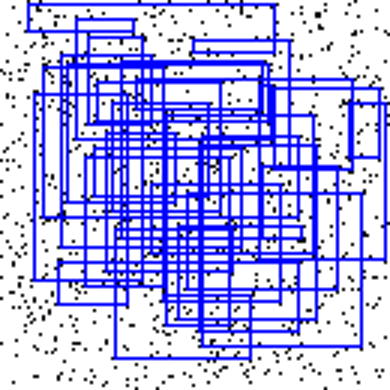

In [87]:
def draw_picture(lines, seen):
    from PIL import Image, ImageDraw
    w, h = 130, 130
    img = Image.new('RGB', (w, h), color = 'white')
    draw = ImageDraw.Draw(img)
    for r in range(w):
        for c in range(h):
            if (r, c) in seen:
                draw.point((c, r), fill='blue')
            if lines[r][c] == '#':
                draw.point((c, r), fill='black')

    # lets scale the image
    img = img.resize((3 * w, 3 * h))
    img.show()

def visualize_possible_loops(lines, route, init_pos, init_dir):
    lines = [list(line[:-1]) for line in lines]
    
    loops = set()
    for i, (pos, _) in enumerate(route):
        # Check for loops
        lines[pos[0]][pos[1]] = '#'
        seen, _, is_loop = simulate_route(lines, init_pos, init_dir)
        if is_loop and pos != init_pos and not loops:
            loops |= seen
        lines[pos[0]][pos[1]] = '.'

    draw_picture(lines, loops)

init_pos, init_dir = get_init_guard_pos(lines)
visualize_possible_loops(lines, route, init_pos, init_dir)

## Day 7: Bridge Repair


In [88]:
with open('day 7/input.txt') as f:
    lines = f.readlines()

len(lines)

850

In [90]:
def get_target_and_eqs_members(lines):
    targets, eqs = [], []
    for line in lines:
        target, eq = line[:-1].split(': ')
        eq = eq.split(' ')
        targets.append(int(target))
        eqs.append(eq)
    
    return targets, eqs

targets, eqs = get_target_and_eqs_members(lines)
print(targets[:5], eqs[:5])

[487656, 65816524826, 90059295, 2109036, 191815905829] [['43', '7', '54', '3', '6', '28'], ['3', '29', '7', '451', '5', '64', '26', '1', '1', '9'], ['900', '1', '592', '92'], ['59', '8', '133', '7', '83', '1', '6'], ['7', '4', '2', '7', '1', '979', '9', '8', '1', '638', '9']]


In [91]:
from functools import cache

@cache
def dp(i, op, cur, target, eq):
    if i == len(eq) - 1:
        return cur == target

    return dp(i + 1, 0, cur + int(eq[i + 1]), target, eq) or dp(i + 1, 1, cur * int(eq[i + 1]), target, eq)


In [92]:
ans = 0
for target, eq in zip(targets, eqs):
    if dp(0, 0, int(eq[0]), target, tuple(eq)):
        ans += target

print(f'1) The total calibration result is {ans}')

1) The total calibration result is 1260333054159


In [93]:
from functools import cache

@cache
def dp(i, op, cur, target, eq):
    if i == len(eq) - 1:
        return cur == target

    return dp(i + 1, 2, int(str(cur) + eq[i + 1]), target, eq) or dp(i + 1, 0, cur + int(eq[i + 1]), target, eq) or dp(i + 1, 1, cur * int(eq[i + 1]), target, eq)


In [94]:
ans = 0
for target, eq in zip(targets, eqs):
    if dp(0, 0, int(eq[0]), target, tuple(eq)):
        ans += target

print(f'2) The total calibration result with concatenation operator is {ans}')

2) The total calibration result with concatenation operator is 162042343638683


## Day 8: Resonant Collinearity 

In [95]:
with open('day 8/input.txt') as f:
    lines = f.readlines()

m, n = len(lines), len(lines[0]) - 1
m, n

(50, 50)

In [96]:
from dataclasses import dataclass

@dataclass(unsafe_hash=True)
class Vector:
    x: int
    y: int

    def __add__(self, other):
        return Vector(self.x + other.x, self.y + other.y)

    def __sub__(self, other):
        return Vector(self.x - other.x, self.y - other.y)

    def __mul__(self, k: int):
        return Vector(self.x * k, self.y * k)


In [97]:
a, b = Vector(1, 2), Vector(3, 4)
a + b, a - b, a + Vector(1, 1) * 2 == b

(Vector(x=4, y=6), Vector(x=-2, y=-2), True)

In [98]:
antennas = {}
for i, line in enumerate(lines):
    for j, e in enumerate(line[:-1]):
        if e != '.':
            antennas[Vector(i, j)] = e

len(antennas)

166

In [99]:
from itertools import product

antinodes = set()
for a, b in product(antennas, repeat=2):
    if a == b or antennas[a] != antennas[b]:
        continue
    u, v = a + (b - a) * 2, b + (a - b) * 2
    if 0 <= u.x < m and 0 <= u.y < n:
        antinodes.add(u)
    if 0 <= v.x < m and 0 <= v.y < n:
        antinodes.add(v)

print(f'1) Number of antinodes is {len(antinodes)}')

1) Number of antinodes is 289


In [100]:
from itertools import product

antinodes = set()
for a, b in product(antennas, repeat=2):
    if a == b or antennas[a] != antennas[b]:
        continue

    p1, p2, t = a, b, 0
    while (0 <= p1.x < m and 0 <= p1.y < n) or (0 <= p2.x < m and 0 <= p2.y < n):
        p1, p2 = a + (b - a) * t, b + (a - b) * t
        if 0 <= p1.x < m and 0 <= p1.y < n:
            antinodes.add(p1)
        if 0 <= p2.x < m and 0 <= p2.y < n:
            antinodes.add(p2)
        t += 1

print(f'2) Number of antinodes if we consider the effects of resonant harmonics is {len(antinodes)}')

2) Number of antinodes if we consider the effects of resonant harmonics is 1030


## Day 9: Disk Fragmenter

In [101]:
with open('day 9/input.txt') as f:
    lines = f.readlines()

len(lines[0]) - 1

19999

In [102]:
memory = {}
id = 0
cur_ptr = 0
allocated = 0
for i, e in enumerate(lines[0][:-1]):
    if i % 2:
        for ptr in range(cur_ptr, cur_ptr + int(e)):
            memory[ptr] = -1

        cur_ptr += int(e)
    else:
        for ptr in range(cur_ptr, cur_ptr + int(e)):
            memory[ptr] = id

        allocated += int(e)
        cur_ptr += int(e)
        id += 1

memory[2]
memory[len(memory)-1], id, allocated

(9999, 10000, 49744)

In [103]:
first_free = 2
last_allocated = len(memory) - 1
while first_free < allocated:
    memory[first_free], memory[last_allocated] = memory[last_allocated], -1
    while memory[first_free] != -1:
        first_free += 1
    while memory[last_allocated] == -1:
        last_allocated -= 1

first_free, last_allocated
memory[2]

9999

In [104]:
checksum = 0
for ptr, id in memory.items():
    if id == -1:
        continue
    checksum += id * ptr

print(f'1) the resulting filesystem checksum is {checksum}')

1) the resulting filesystem checksum is 6283404590840


In [105]:
free_chunks = []
allocated_chunks = []
id = 0
cur_ptr = 0
for i, e in enumerate(lines[0][:-1]):
    if i % 2:
        if int(e) > 0:
            free_chunks.append((cur_ptr, int(e)))
            cur_ptr += int(e)
    elif int(e):
        allocated_chunks.append((cur_ptr, int(e), id))
        cur_ptr += int(e)
        id += 1

free_chunks[:10], allocated_chunks[:10]

([(2, 2),
  (5, 7),
  (20, 7),
  (36, 1),
  (40, 5),
  (54, 9),
  (71, 8),
  (83, 2),
  (87, 7),
  (98, 1)],
 [(0, 1, 0),
  (1, 1, 1),
  (4, 1, 2),
  (12, 8, 3),
  (27, 9, 4),
  (37, 3, 5),
  (45, 4, 6),
  (49, 5, 7),
  (63, 8, 8),
  (79, 4, 9)])

In [106]:
from collections import deque

def compact_files_wo_fragmentation(free_chunks, allocated_chunks):
    free_chunks, moved_chunks = deque(free_chunks), []
    stayed_chunks = []
    while allocated_chunks:
        free_ptr, free_size = free_chunks.popleft()
        allocated_ptr, allocated_size, allocated_id = allocated_chunks.pop()
        cnt = 0

        while cnt < len(free_chunks) and free_ptr < allocated_ptr and allocated_size > free_size:
            free_chunks.append((free_ptr, free_size))
            free_ptr, free_size = free_chunks.popleft()
            cnt += 1

        if free_ptr < allocated_ptr and allocated_size <= free_size:
            moved_chunks.append((free_ptr, allocated_size, allocated_id))
            if free_size > allocated_size:
                free_chunks.appendleft((free_ptr + allocated_size, free_size - allocated_size))
        else:
            stayed_chunks.append((allocated_ptr, allocated_size, allocated_id))
            free_chunks.appendleft((free_ptr, free_size))


        free_chunks.rotate(cnt)

    return moved_chunks, stayed_chunks


moved_chunks, stayed_chunks = compact_files_wo_fragmentation(free_chunks, allocated_chunks)

In [107]:
moved_chunks[:10]

[(5, 4, 9999),
 (20, 4, 9998),
 (54, 9, 9997),
 (40, 5, 9996),
 (71, 4, 9995),
 (75, 4, 9994),
 (87, 6, 9993),
 (107, 4, 9992),
 (2, 1, 9991),
 (124, 6, 9990)]

In [108]:
stayed_chunks[:10]

[(51691, 9, 5454),
 (51568, 9, 5440),
 (51518, 9, 5435),
 (51407, 9, 5423),
 (51332, 9, 5412),
 (51147, 9, 5392),
 (50949, 9, 5368),
 (50859, 9, 5360),
 (50766, 9, 5352),
 (50714, 9, 5346)]

00992111777.44.333....5555.6666.....8888..

In [109]:
checksum = 0
for ptr, size, id in moved_chunks:
    checksum += id * (2 * ptr + size - 1) * size // 2

for ptr, size, id in stayed_chunks:
    checksum += id * (2 * ptr + size - 1) * size // 2

print(f'2) the resulting filesystem checksum is {checksum}')

2) the resulting filesystem checksum is 6304576012713


In [110]:
a = 0xffff
a & 2024

2024

## Day 10: Hoof It

In [111]:
with open('day 10/input.txt') as f:
    lines = f.readlines()

m, n = len(lines), len(lines[0]) - 1
m, n

(43, 43)

In [112]:
hmap = [[int(h) for h in line[:-1]] for line in lines]
m, n = len(hmap), len(hmap[0])

In [113]:
def bfs_matrix(start: tuple[int]) -> int:
    '''
    Do a BFS in a matrix
    '''
    from collections import deque

    moves = [(1, 0), (-1, 0), (0, 1), (0, -1)]
    seen = set([start])
    q = deque([(start[0], start[1])])
    score = 0
    while q:
        r, c = q.popleft()
        if hmap[r][c] == 9:
            score += 1
        for dr, dc in moves:
            if r + dr >= m or r + dr < 0 or c + dc >= n or c + dc < 0:
                continue
            if (r + dr, c + dc) in seen or (hmap[r + dr][c + dc] - hmap[r][c]) != 1:
                continue
            q.append((r + dr, c + dc))
            seen.add((r + dr, c + dc))
    
    return score


In [114]:
total_score = 0
for i, line in enumerate(hmap):
    for j, h in enumerate(line):
        if h == 0:
            total_score += bfs_matrix((i, j))

print(f'1) the sum of the scores of all trailheads on your topographic map is {total_score}')

1) the sum of the scores of all trailheads on your topographic map is 501


In [115]:
def dfs_matrix(r: int, c: int) -> int:
    if hmap[r][c] == 9:
        return 1

    moves = [(1, 0), (-1, 0), (0, 1), (0, -1)]
    rating = 0
    for dr, dc in moves:
        if r + dr >= m or r + dr < 0 or c + dc >= n or c + dc < 0:
            continue
        if hmap[r + dr][c + dc] - hmap[r][c] == 1:
            rating += dfs_matrix(r + dr, c + dc)

    return rating


In [116]:
total_rating = 0
for i, line in enumerate(hmap):
    for j, h in enumerate(line):
        if h == 0:
            total_rating += dfs_matrix(i, j)

print(f'2) the sum of the ratings of all trailheads is {total_rating}')

2) the sum of the ratings of all trailheads is 1017


## Day 11: Plutonian Pebbles 

In [117]:
init_arrangement = ['8435', '234', '928434', '14', '0', '7', '92446', '8992692']
init_arrangement

['8435', '234', '928434', '14', '0', '7', '92446', '8992692']

In [118]:
init_arrangement = ['8435', '234', '928434', '14', '0', '7', '92446', '8992692']
init_arrangement = {i: v for i, v in enumerate(init_arrangement)}
for _ in range(25):
    arrangement = init_arrangement.copy()
    i = 0
    for stone in arrangement.values():
        if not len(stone) % 2:
            init_arrangement[i] = str(int(stone[:len(stone) // 2]))
            init_arrangement[i + 1] = str(int(stone[len(stone) // 2:]))
            i += 2
        else:
            init_arrangement[i] = str(2024 * int(stone)) if int(stone) else '1'
            i += 1

print(f'1) Number of stones after blinking 25 times is {len(init_arrangement)}')

1) Number of stones after blinking 25 times is 182081


In [119]:
from functools import cache

@cache
def dfs(stone, level):
    if not level:
        return 1
    if not len(stone) % 2:
        return dfs(str(int(stone[:len(stone) // 2])), level - 1) + dfs(str(int(stone[len(stone) // 2:])), level - 1)
    return dfs(str(2024 * int(stone)), level - 1) if int(stone) else dfs('1', level - 1)


In [120]:
init_arrangement = ['8435', '234', '928434', '14', '0', '7', '92446', '8992692']

print(f'2) Number of stones after blinking 75 times is {sum(dfs(stone, 75) for stone in init_arrangement)}')

2) Number of stones after blinking 75 times is 216318908621637


## Day 12: Garden Groups

In [121]:
with open('day 12/input.txt') as f:
    lines = f.readlines()

m, n = len(lines), len(lines[0]) - 1
m, n

(140, 140)

In [122]:
def calculate_cost():
    dirs = [(1, 0), (-1, 0), (0, 1), (0, -1)]
    area, perimeter = 0, 0
    seen = set()

    def dfs(i, j):
        nonlocal area, perimeter
        if (i, j) in seen:
            return
        seen.add((i, j))
        area += 1
        perimeter += 4
        for di, dj in dirs:
            if 0 <= i + di < m and 0 <= j + dj < n and lines[i + di][j + dj] == lines[i][j]:
                perimeter -= 1
                dfs(i + di, j + dj)

    total_cost = 0
    for i, line in enumerate(lines):
        for j, plot in enumerate(line[:-1]):
            if (i, j) in seen:
                continue
            area, perimeter = 0, 0
            dfs(i, j)
            total_cost += area * perimeter

    return total_cost


total_cost = calculate_cost()
print(f'1. The total price of fencing all regions is {total_cost}')

1522850

In [123]:
from collections import defaultdict


class UnionFind:

    def __init__(self, n: int, vertices = None):
        if vertices:
            self.parent = {v: v for v in vertices}
            self.size = {v: 1 for v in vertices}
            self.components = len(vertices)
        else:
            self.parent = list(range(n + 1))
            self.size = [1] * (n + 1)
            self.components = n


    def find(self, x: int) -> int:
        if self.parent[x] == x:
            return x
        self.parent[x] = self.find(self.parent[x])
        return self.parent[x]


    def union(self, x: int, y: int) -> int:
        x = self.find(x)
        y = self.find(y)
        if x == y:
            return 0

        if self.size[x] > self.size[y]:
            self.size[x] += self.size[y]
            self.parent[y] = x
        else:
            self.size[y] += self.size[x]
            self.parent[x] = y

        self.components -= 1
        return 1


    def are_connected(self, x: int, y: int) -> bool:
        return self.find(x) == self.find(y)


In [124]:
def calculate_cost_w_discount():
    dirs = [(1, 0), (0, -1), (-1, 0), (0, 1)]
    seen = set()

    def dfs(i, j):
        nonlocal area
        if (i, j) in seen:
            return
        seen.add((i, j))
        area += 1
        for di, dj in dirs:
            if 0 <= i + di < m and 0 <= j + dj < n and lines[i + di][j + dj] == lines[i][j]:
                dfs(i + di, j + dj)
            else:
                fence.add((i + di, j + dj, di, dj))

    def count_sides(fence):
        uf = UnionFind(len(fence), fence)
        for i, j, di, dj in fence:
            di_, dj_ = dj, di
            if (i + di_, j + dj_, di, dj) in fence:
                uf.union((i, j, di, dj), (i + di_, j + dj_, di, dj))
            if (i - di_, j - dj_, di, dj) in fence:
                uf.union((i, j, di, dj), (i - di_, j - dj_, di, dj))

        return uf.components


    total_cost = 0
    for i, line in enumerate(lines):
        for j, plot in enumerate(line[:-1]):
            if (i, j) in seen:
                continue
            area, fence = 0, set()
            dfs(i, j)
            total_cost += area * count_sides(fence)

    return total_cost


total_cost = calculate_cost_w_discount()
print(f'2. The total price of fencing all regions with a bulk discount is {total_cost}')

953738

## Day 13: Claw Contraption

In [125]:
with open('day 13/input.txt') as f:
    lines = f.readlines()

m, n = len(lines), len(lines[0]) - 1
m, n

(1279, 20)

In [126]:
def min_tokens_to_win_all(lines):
    from math import inf
    
    def brute_force(a_x, a_y, b_x, b_y, X, Y):
        for a in range(101):
            for b in range(101):
                if a * a_x + b * b_x == X and a * a_y + b * b_y == Y:
                    return 3 * a + b

        return inf
    
    total_min_tokens = 0
    for i in range(0, m, 4):
        a_x, a_y = int(lines[i][12:14]), int(lines[i][18:20])
        b_x, b_y = int(lines[i + 1][12:14]), int(lines[i + 1][18:20])
        X, Y = int(lines[i + 2].split(',')[0][9:]), int(lines[i + 2].split(',')[1][3:])
        min_tokens = brute_force(a_x, a_y, b_x, b_y, X, Y)
        total_min_tokens += min_tokens if min_tokens != inf else 0

    return total_min_tokens
    
print(f'1. The fewest tokens you would have to spend to win all is {min_tokens_to_win_all(lines)}')

26810

In [127]:
def min_tokens_to_win_all_adjust(lines):
    from math import inf, gcd

    adjustment = 10_000_000_000_000
    
    def solver(a_x, a_y, b_x, b_y, X, Y):
        nonlocal cnt
        if (X + adjustment) % gcd(a_x, b_x) or (Y + adjustment) % gcd(a_y, b_y):
            return inf
        
        u, v = a_x // gcd(a_x, b_x), b_x // gcd(a_x, b_x)
        a_0, b_0 = None, None
        for a in range(2 * v + 1):
            if not (X + adjustment - a * a_x) % b_x:
                a_0, b_0 = a, (X + adjustment - a * a_x) // b_x
                break
        

        if (Y + adjustment - a_0 * a_y - b_0 * b_y) % (v * a_y - u * b_y):
            return inf
        k = (Y + adjustment - a_0 * a_y - b_0 * b_y) // (v * a_y - u * b_y)
        a, b = a_0 + k * v, b_0 - k * u
        
        return 3 * a + b
    
    
    total_min_tokens = 0
    cnt = 0
    for i in range(0, m, 4):
        a_x, a_y = int(lines[i][12:14]), int(lines[i][18:20])
        b_x, b_y = int(lines[i + 1][12:14]), int(lines[i + 1][18:20])
        X, Y = int(lines[i + 2].split(',')[0][9:]), int(lines[i + 2].split(',')[1][3:])

        min_tokens = solver(a_x, a_y, b_x, b_y, X, Y)
        total_min_tokens += min_tokens if min_tokens != inf else 0


    return total_min_tokens
    
print(f'2. The fewest tokens you would have to spend to win all with adjustment is {min_tokens_to_win_all_adjust(lines)}')

108713182988244

## Day 14: Restroom Redoubt

In [128]:
with open('day 14/input.txt') as f:
    lines = f.readlines()

m, n = len(lines), len(lines[0]) - 1
m, n

(500, 16)

In [129]:
robots_pos, robots_vel = [], []
for line in lines:
    if line[0] == 'x':
        print(line)
        break
    pos, vel = line[:-1].split(' ')
    robots_pos.append(pos[2:].split(','))
    robots_vel.append(vel[2:].split(','))

robots_pos[:10], robots_vel[:10]

([['7', '85'],
  ['4', '17'],
  ['60', '71'],
  ['82', '99'],
  ['56', '11'],
  ['20', '25'],
  ['57', '97'],
  ['89', '37'],
  ['32', '51'],
  ['72', '40']],
 [['-65', '-36'],
  ['-37', '-76'],
  ['-8', '-19'],
  ['20', '-59'],
  ['50', '-21'],
  ['66', '12'],
  ['-67', '-20'],
  ['10', '52'],
  ['46', '56'],
  ['26', '-80']])

In [130]:
q1, q2, q3, q4 = 0, 0, 0, 0
w, h = 101, 103
num_seconds = 100 
for pos, vel in zip(robots_pos, robots_vel):
    x, y = int(pos[0]), int(pos[1])
    x = (x + int(vel[0]) * num_seconds) % w
    y = (y + int(vel[1]) * num_seconds) % h
    if x < w // 2 and y < h // 2:
        q1 += 1
    elif x < w // 2 and y > h // 2:
        q2 += 1
    elif x > w // 2 and y < h // 2:
        q3 += 1
    elif x > w // 2 and y > h // 2:
        q4 += 1

print(f'Robots distribution after {num_seconds} seconds have elapsed: {q1}, {q2}, {q3}, {q4}')
print(f'1. The safety factor after {num_seconds} seconds have elapsed {q1 * q2 * q3 * q4}')

111 119 131 132


228410028

In [131]:
def find_christmas_tree(robots_pos, robots_vel, w=101, h=103):
    from collections import defaultdict
    from math import inf
    possible = 0
    min_var = inf
    for t in range(101 * 103 + 1):
        var = 0
        for pos, vel in zip(robots_pos, robots_vel):
            x, y = (int(pos[0]) + t * int(vel[0])) % w, (int(pos[1]) + t * int(vel[1])) % h
            var += (x - 50) ** 2 + (y - 51) ** 2

        if var < min_var:
            possible = t
            min_var = var

    return possible

possible = find_christmas_tree(robots_pos, robots_vel)
print(f'2. The fewest number of seconds that must elapse for the robots to display the Christmas Tree is {possible}')

8258

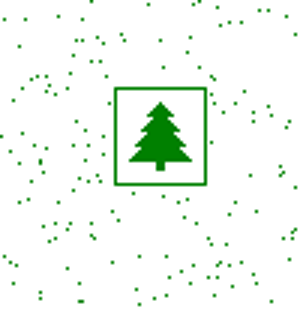

In [132]:
def draw_picture(robots_pos, robots_vel, n):
    from PIL import Image, ImageDraw
    w, h = 101, 103
    img = Image.new('RGB', (w, h), color = 'white')
    draw = ImageDraw.Draw(img)
    for pos, vel in zip(robots_pos, robots_vel):
        x, y = int(pos[0]), int(pos[1])
        x = (x + int(vel[0]) * n) % w
        y = (y + int(vel[1]) * n) % h
        draw.point((x, y), fill='green')

    # lets scale the image
    img = img.resize((3 * w, 3 * h))
    img.show()

draw_picture(robots_pos, robots_vel, possible)

## Day 15: Warehouse Woes

In [20]:
with open('day 15/input.txt') as f:
    lines = f.readlines()

m, n = len(lines), len(lines[0]) - 1
m, n

(71, 50)

In [21]:
def get_map(lines):
    wh_map = []
    moves = []
    mode = 0
    for line in lines:
        if line == '\n':
            mode += 1
            continue
        if mode == 0:
            wh_map.append(list(line[:-1]))
        elif mode == 1:
            moves += list(line[:-1])
    
    return wh_map, moves

wh_map, moves = get_map(lines)

In [22]:
def shift(pos, dir):
    moves = {'^': (-1, 0), '>': (0, 1), 'v': (1, 0), '<': (0, -1)}
    next_pos = (pos[0] + moves[dir][0], pos[1] + moves[dir][1])
    next = wh_map[next_pos[0]][next_pos[1]]
    while next == 'O':
        next_pos = (next_pos[0] + moves[dir][0], next_pos[1] + moves[dir][1])
        next = wh_map[next_pos[0]][next_pos[1]]
        wh_map[next_pos[0]][next_pos[1]] = 'O' if next != '#' else '#'

    if next != '#':
        wh_map[pos[0]][pos[1]] = '.'
        pos = (pos[0] + moves[dir][0], pos[1] + moves[dir][1])
        wh_map[pos[0]][pos[1]] = '@'
        return pos
    
    return pos

In [23]:
def find_start():
    start = None
    for i in range(len(wh_map)):
        for j in range(len(wh_map[0])):
            if wh_map[i][j] == '@':
                start = (i, j)
                break
    
    return start

start = find_start()
start

(24, 24)

In [25]:
cur_pos = start
for move in moves:
    cur_pos = shift(cur_pos, move)

In [26]:
def compute_gps():
    gps = 0
    for i in range(len(wh_map)):
        for j in range(len(wh_map[0])):
            if wh_map[i][j] == 'O':
                gps += 100 * i + j
    
    return gps

print(f'1. The sum of al boxes GPS coordinates in the first warehouse is {compute_gps()}')

1568399

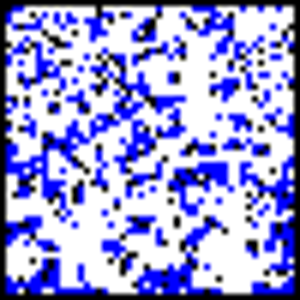

In [27]:
def draw_map():
    from PIL import Image, ImageDraw
    w, h = len(wh_map[0]), len(wh_map)
    img = Image.new('RGB', (w, h), color = 'white')
    draw = ImageDraw.Draw(img)
    for r in range(len(wh_map)):
        for c in range(len(wh_map[0])):
            if wh_map[r][c] == 'O':
                draw.point((c, r), fill='blue')
            if wh_map[r][c] == '#':
                draw.point((c, r), fill='black')

    # lets scale the image
    img = img.resize((6 * w, 6 * h))
    img.show()

draw_map()

In [28]:
def scale_map(wh_map):
    wh_map_scaled = [[] for _ in range(len(wh_map))]
    for i in range(len(wh_map)):
        for j in range(len(wh_map[0])):
            if wh_map[i][j] == '#':
                wh_map_scaled[i] += ['#', '#']
            if wh_map[i][j] == 'O':
                wh_map_scaled[i] += ['[', ']']
            if wh_map[i][j] == '.':
                wh_map_scaled[i] += ['.', '.']
            if wh_map[i][j] == '@':
                wh_map_scaled[i] += ['@', '.']   
    
    return wh_map_scaled

map_, moves = get_map(lines)
wh_map = scale_map(map_)   

In [29]:
start = find_start()
start

(24, 48)

In [39]:
# my failed attempt
# todo: fix it!
#
# def shift(pos, dir, map, seen):
#     dirs = {'^': (-1, 0), '>': (0, 1), 'v': (1, 0), '<': (0, -1)}
#     # print(pos, dir)
#     seen.add((pos, dir))
#     next_pos = (pos[0] + dirs[dir][0], pos[1] + dirs[dir][1])
#     next = map[next_pos[0]][next_pos[1]]
#     can_move = True
#     if next == '[' or next == ']':
#         if dir == '^' or dir == 'v':
#             if next == ']' and ((pos[0], pos[1] - 1), dir) not in seen:
#                 can_move &= shift((pos[0], pos[1] - 1), dir, map, seen)
#             elif next == '[' and ((pos[0], pos[1] + 1), dir) not in seen:
#                 can_move &= shift((pos[0], pos[1] + 1), dir, map, seen)
        
#         if ((next_pos[0], next_pos[1]), dir) not in seen:
#             can_move &= shift((next_pos[0], next_pos[1]), dir, map, seen)
        
        

#     if can_move and next != '#':
#         next_pos = (pos[0] + dirs[dir][0], pos[1] + dirs[dir][1])
#         map[next_pos[0]][next_pos[1]] = map[pos[0]][pos[1]]
#         map[pos[0]][pos[1]] = '.'
#         return can_move
#     return False

    # def simulate(wh_map, moves):
#     dirs = {'^': (-1, 0), '>': (0, 1), 'v': (1, 0), '<': (0, -1)}
#     cur_pos = (24, 48)
#     map = wh_map.copy()
#     for move in moves:  
#         seen = set()
#         if shift(cur_pos, move, map, seen):
#             cur_pos = (cur_pos[0] + dirs[move][0], cur_pos[1] + dirs[move][1])
#             print(cur_pos, wh_map[24][48])


# simulate(wh_map.copy(), moves)

In [31]:
from collections import defaultdict

def get_map_and_moves(lines):
    warehouse = defaultdict(lambda: '.')
    moves = ''
    robot = None
    mode = 0
    for y, line in enumerate(lines):
        if line.strip() == '':
            mode = 1
            continue
        if mode == 0:
            x = 0
            for ch in line.strip():
                if ch != '.':
                    if ch == '@':
                        robot = complex(x, y)
                    elif ch == '#':
                        warehouse[complex(x, y)] = ch
                        warehouse[complex(x + 1, y)] = ch
                    elif ch == 'O':
                        warehouse[complex(x, y)] = '['
                        warehouse[complex(x + 1, y)] = ']'
                x += 2

            warehouse['MAX_Y'] = y
            warehouse['MAX_X'] = x
        elif mode == 1:
            moves += line.strip()

    return warehouse, moves, robot

warehouse, moves, robot = get_map_and_moves(lines)

In [32]:
def can_move(warehouse, robot, direction):
    check = complex(robot)

    # check for east/west movement...
    if direction.real != 0:
        while 0 <= check.real + direction.real <= warehouse['MAX_X']:
            check += direction
            if warehouse[check] == '#':
                return False
            elif warehouse[check] == '.':
                return True

        return False

    # check for north/south movement
    else:
        if warehouse[check + direction] == '#':
            return False
        elif warehouse[check + direction] == '.':
            return True
        elif warehouse[check + direction] == '[':
            return can_move(warehouse, check + direction, direction) and can_move(
                warehouse, check + direction + 1, direction
            )
        elif warehouse[check + direction] == ']':
            return can_move(warehouse, check + direction - 1, direction) and can_move(
                warehouse, check + direction, direction
            )

In [33]:
def build_affected(warehouse, robot, direction):
    if warehouse[robot + direction] == '.':
        return {robot + direction}
    elif warehouse[robot + direction] == '[':
        return (
            {robot + direction, robot + direction + 1}
            | build_affected(warehouse, robot + direction, direction)
            | build_affected(warehouse, robot + direction + 1, direction)
        )
    elif warehouse[robot + direction] == ']':
        return (
            {robot + direction - 1, robot + direction}
            | build_affected(warehouse, robot + direction - 1, direction)
            | build_affected(warehouse, robot + direction, direction)
        )
        return set()


In [34]:
def make_move(warehouse, robot, direction):
    step = complex(robot)

    # check for east/west movement...
    if direction.real != 0:
        while 0 <= step.real + direction.real <= warehouse['MAX_X']:
            step += direction
            if warehouse[step] == '.':
                break

        if direction.real > 0:
            rng = range(
                int(max(robot.real, step.real)), int(min(robot.real, step.real)), -1
            )
        else:
            rng = range(
                int(min(robot.real, step.real)), int(max(robot.real, step.real))
            )
        for crate in rng:
            new = complex(crate, step.imag)
            old = complex(crate, step.imag) + direction * -1
            warehouse[new] = warehouse[old]
            del warehouse[old]

    # check for north/south movement
    else:
        affected = sorted(
            build_affected(warehouse, robot, direction),
            key=lambda crate: (crate.imag, crate.real),
            reverse=direction.imag > 0,
        )
        for crate in affected:
            if warehouse[crate] in ('[', ']'):
                new = crate + direction
                old = crate
                warehouse[new] = warehouse[old]
                del warehouse[old]

    return robot + direction


In [35]:
def simulate(warehouse, moves, robot):
    directions = {'^': 0 - 1j, '>': 1 + 0j, 'v': 0 + 1j, '<': -1 + 0j}

    for move in moves:
        direction = directions[move]

        if warehouse[robot + direction] == '.':
            robot += direction
        elif can_move(warehouse, robot, direction):
            robot = make_move(warehouse, robot, direction)

warehouse, moves, robot = get_map_and_moves(lines)
simulate(warehouse, moves, robot)

In [36]:
def compute_gps(warehouse):
    gps = 0
    for pos in warehouse:
        if warehouse[pos] == '[':
            gps += int(pos.real) + 100 * int(pos.imag)
    
    return gps


In [37]:
print(f'2. The sum of al boxes GPS coordinates in the second, scaled-up warehouse is {compute_gps(warehouse)}')

1575877

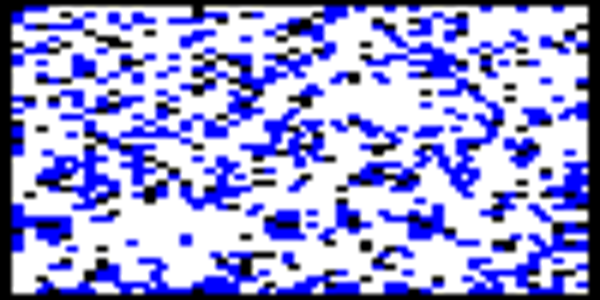

In [38]:
def draw_map(warehouse):
    from PIL import Image, ImageDraw
    w, h = 100, 50
    img = Image.new('RGB', (w, h), color = 'white')
    draw = ImageDraw.Draw(img)
    for pos in warehouse:
        if warehouse[pos] in ('[', ']'):
            draw.point((int(pos.real), int(pos.imag)), fill='blue')
        if warehouse[pos] == '#':
            draw.point((int(pos.real), int(pos.imag)), fill='black')

    # lets scale the image
    img = img.resize((6 * w, 6 * h))
    img.show()

draw_map(warehouse)

## Day 16: Reindeer Maze

In [112]:
with open('day 16/input.txt') as f:
    lines = f.readlines()

m, n = len(lines), len(lines[0]) - 1
m, n

(141, 141)

In [113]:
def build_maze(lines):
    return [list(line[:-1]) for line in lines]

maze = build_maze(lines)

In [114]:
def dijkstra_matrix(maze: list[list[str]], start: tuple, end: tuple, draw=None) -> int:

    from heapq import heappop, heappush
    from collections import defaultdict

    dirs = ['^', '>', 'v', '<']
    moves = [(-1, 0), (0, 1), (1, 0), (0, -1)]
    start_dir = 1
    seen = {(start, start_dir): 0}
    predecessors = defaultdict(list)
    pq = [(0, start, start_dir)]
    min_score = -1

    while pq:
        dist, cur_pos, cur_dir = heappop(pq)
        if cur_pos == end:
            min_score = dist 
            break
        for next_dir, (dr, dc) in enumerate(moves):
            next_pos = (cur_pos[0] + dr, cur_pos[1] + dc)
            if maze[next_pos[0]][next_pos[1]] == '#':
                continue
            cost = 0
            if next_dir == cur_dir:
                cost = 1
            elif (next_dir - cur_dir) % 4 in (1, 3):
                cost = 1001
            else:
                cost = 2001
            if (next_pos, next_dir) in seen and seen[(next_pos, next_dir)] < dist + cost:
                continue
            seen[(next_pos, next_dir)] = dist + cost
            heappush(pq, (dist + cost, next_pos, next_dir))
            predecessors[(next_pos, next_dir)].append((cur_pos, cur_dir))


    seen = set([(end, 0)])
    cur_cells = [(end, 0)]
    while cur_cells:
        cur_cells_new = []
        for cell, dir in cur_cells:
            for new_cell, new_dir in predecessors[(cell, dir)]:
                if (new_cell, new_dir) not in seen:
                    cur_cells_new += [(new_cell, new_dir)]
                    seen.add((new_cell, new_dir))
        
        cur_cells = cur_cells_new

    paths = set([cell for cell, _ in seen])
    if draw:
        for r, c in paths:
            draw.point((c, r), fill='blue')
    
    return min_score, len(paths)


In [115]:
lowest_score, num_tiles = dijkstra_matrix(maze, (139, 1), (1, 139))
print(f'1. The lowest score a Reindeer could possibly get is {lowest_score}')
print(f'2. The number of tiles are part of at least one of the best paths through the maze is {num_tiles}')

1. The lowest score a Reindeer could possibly get is 107512
2. The number of tiles are part of at least one of the best paths through the maze is 561


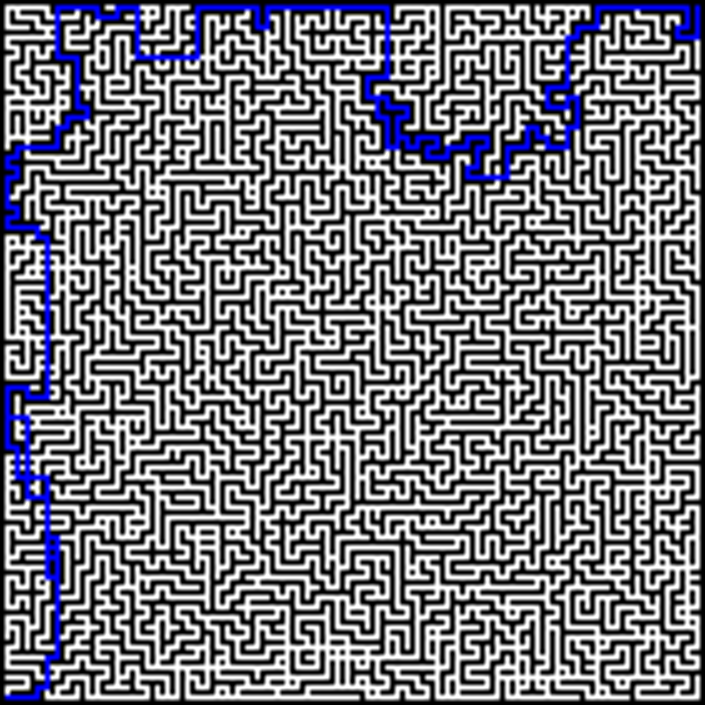

In [117]:
def draw_maze(maze, path=False):
    from PIL import Image, ImageDraw
    w, h = len(maze[0]), len(maze) # 17, 17
    img = Image.new('RGB', (w, h), color = 'white')
    draw = ImageDraw.Draw(img)
    for i in range(w):
        for j in range(h):
            if maze[i][j] == '#':
                draw.point((j, i), fill='black')

    if path:
        # dijkstra_matrix(maze, (139, 1), (1, 139), draw)
        dijkstra_matrix(maze, (139, 1), (1, 139), draw) 
    # lets scale the image
    img = img.resize((5 * w, 5 * h))
    img.show()

draw_maze(maze, path=True)

## Day 17: Chronospatial Computer

In [118]:
def run_program(a, b, c, program):
    A, B, C = a, b, c
    def combo(operand):
        match operand:
            case '0' | '1' | '2' | '3':
                return int(operand)
            case '4':
                return A
            case '5':
                return B
            case '6':
                return C
    
    prog = program.split(',')
    output = []
    ptr = 0 
    while ptr < len(prog):
        opcode, operand = prog[ptr], prog[ptr + 1]
        match opcode:
            case '0':
                A = A // (2 ** combo(operand))
            case '1':
                B ^= int(operand)
            case '2':
                B = combo(operand) % 8
            case '3':
                ptr = int(operand) - 2 if A else ptr
            case '4':
                B ^= C
            case '5':
                output += [str(combo(operand) % 8), ',']
            case '6':
                B = A // (2 ** combo(operand))
            case '7':
                C = A // (2 ** combo(operand))
        
        ptr += 2
    
    return ''.join(output)[:-1]


program_output = run_program(35200350, 0, 0, '2,4,1,2,7,5,4,7,1,3,5,5,0,3,3,0')
print(f'1. The program is trying to output is {program_output}')

1. The program is trying to output is 2,7,4,7,2,1,7,5,1


In [119]:
def check(A, pos, program):
    prog = program.split(',')
    if (((A % 8) ^ 2) ^ (A // 2 ** ((A % 8) ^ 2)) ^ 3) % 8 == int(prog[pos]):
        return True
    
    return False

In [120]:
def backtrack(deg, a, b):
    from math import inf
    if deg < 0:
        return a

    it = inf
    b <<= 3
    for x in range(8):
        if check(b + x, deg, '2,4,1,2,7,5,4,7,1,3,5,5,0,3,3,0'):
            it = min(it, backtrack(deg - 1, a + x * 8 ** deg, b + x))
    
    return it

register_A = backtrack(14, 8 ** 15, 1)
print(f'2. The lowest positive initial value for register A that causes the program to output a copy of itself is {register_A}')

2. The lowest positive initial value for register A that causes the program to output a copy of itself is 37221274271220


In [121]:
run_program(37221274271220, 0, 0, '2,4,1,2,7,5,4,7,1,3,5,5,0,3,3,0')

'2,4,1,2,7,5,4,7,1,3,5,5,0,3,3,0'

## Day 18: RAM Run

In [122]:
with open('day 18/input.txt') as f:
    lines = f.readlines()
    
m, n = len(lines), len(lines[0]) - 1
m, n

(3450, 5)

In [123]:
fallen_bytes = []
for line in lines:
    x, y = line[:-1].split(',')
    fallen_bytes.append((int(x), int(y)))

fallen_kilobyte = set(fallen_bytes[:1024])

In [124]:
def bfs_matrix(start):
    from collections import deque
    
    m, n = 70, 70
    moves = [(-1, 0), (0, 1), (1, 0), (0, -1)]
    seen = set([start])
    q = deque([(start[0], start[1], 0)])
    while q:
        r, c, dist = q.popleft()
        if (r, c) == (m, n): 
            return dist
        for dr, dc in moves:
            if r + dr > m or r + dr < 0 or c + dc > n or c + dc < 0: 
                continue
            if (r + dr, c + dc) in seen or (r + dr, c + dc) in fallen_kilobyte: 
                continue
            q.append((r + dr, c + dc, dist + 1))
            seen.add((r + dr, c + dc))

    return -1

print(f'1. The minimum number of steps needed to reach the exit is {bfs_matrix((0, 0))}')

1. The minimum number of steps needed to reach the exit is 454


In [125]:
from collections import defaultdict

fallen_bytes_at = {t: set(fallen_bytes[:t]) for t in range(70 * 70 + 1)}

In [126]:
def bfs_matrix(start, t):
    from collections import deque
    
    m, n = 70, 70
    moves = [(-1, 0), (0, 1), (1, 0), (0, -1)]
    seen = set([start])
    q = deque([(start[0], start[1], 0)])
    while q:
        r, c, dist = q.popleft()
        if (r, c) == (m, n): 
            return dist
        for dr, dc in moves:
            if r + dr > m or r + dr < 0 or c + dc > n or c + dc < 0: 
                continue
            if (r + dr, c + dc) in seen or (r + dr, c + dc) in fallen_bytes_at[t]: 
                continue
            q.append((r + dr, c + dc, dist + 1))
            seen.add((r + dr, c + dc))

    return -1


In [127]:
for t in range(2025, 3025):
    if bfs_matrix((0, 0), t) == -1:
        print(f'2. The coordinates of the first byte that will prevent the exit from being reachable from your starting position is {fallen_bytes[t - 1]}')
        break

2. The coordinates of the first byte that will prevent the exit from being reachable from your starting position is (8, 51)


## Day 19: Linen Layout

In [50]:
with open('day 19/input.txt') as f:
    lines = f.readlines()

m = len(lines)
m

402

In [51]:
towels = []
designs = []
mode = 0
for line in lines:
    if line[0] == '\n':
        mode += 1
        continue
    if mode == 0:
        towels = line[:-1].split(', ')
    if mode == 1:
        designs.append(line[:-1])

towels[:5], designs[:5]

(['gurwuurg', 'ugwrrbuw', 'ubr', 'bbrurww', 'wgw'],
 ['gwwwgrbuwgrbgbwubrbwguwgubrwwurwrbrgwurgwgguww',
  'wwbwbbwubrbruubrwugurrbuuwuuwbrguubbwwbugbbgu',
  'gbwrrgruuurugwwurgwguguugbrggbrwugbugubuggu',
  'uwbrwbwubwbrbgbugubbugwwgwbrrrwuurgwbgrurbwbub',
  'ggwgburrurgwubwbbgrwuwwwwbugwrubguurrgrbbrwrggbrgwwg'])

In [ ]:
def count_possible_designs(towels, designs):
    from functools import cache
    
    @cache
    def dp(i, j, design):
        if j == len(design):
            return design[i:j] in towels
        possible = False
        if design[i:j] in towels:
            possible = dp(j, j + 1, design)
        return dp(i, j + 1, design) or possible
    
    return sum(dp(0, 1, design) for design in designs)

print(f'1. The number of possible designs is {count_possible_designs(set(towels), designs)}')

The number of possible designs is 216


In [ ]:
def count_ways_to_get_possible_designs(towels, designs):
    from functools import cache
    
    @cache
    def dp(i, j, design):
        if j == len(design):
            return design[i:j] in towels

        possible = 0
        if design[i:j] in towels:
            possible += dp(j, j + 1, design)
        return dp(i, j + 1, design) + possible
    
    return sum(dp(0, 1, design) for design in designs)

print(f'2. The total number of ways to get all possible designs is {count_ways_to_get_possible_designs(set(towels), designs)}')

The total number of ways to get all possible designs is 603191454138773


## Day 20: Race Condition

In [54]:
with open('day 20/input.txt') as f:
    lines = f.readlines()

m, n = len(lines), len(lines[0]) - 1
m, n

(141, 141)

In [55]:
maze = [list(line[:-1]) for line in lines]

In [56]:
# def check_cheat_out()
def find_start(maze):
    m, n = len(maze), len(maze[0])
    for i in range(m):
        for j in range(n):
            if maze[i][j] == 'S':
                return (i, j)


In [57]:
def explore(maze, start, distances, can_cheat=False):
    m, n = len(maze), len(maze[0])
    moves = [(-1, 0), (0, 1), (1, 0), (0, -1)]
    seen = {start: 0}
    seen_cheats = set()
    cur_pos = start
    dist = 0
    cnt = 0
    while maze[cur_pos[0]][cur_pos[1]] != 'E':
        for dr, dc in moves:
            next_pos = (cur_pos[0] + dr, cur_pos[1] + dc)
            if next_pos in seen or next_pos in seen_cheats:
                continue
            if maze[next_pos[0]][next_pos[1]] == '#':
                if not (0 <= next_pos[0] + dr < m and 0 <= next_pos[1] + dc < n):
                    continue
                if can_cheat and maze[next_pos[0] + dr][next_pos[1] + dc] in ('.', 'E'):
                    seen_cheats.add(next_pos)
                    if distances[(next_pos[0] + dr, next_pos[1] + dc)] - seen[cur_pos] - 2 >= 100:
                        cnt += 1
            else:
                next_pos_ = next_pos 
                dist += 1
                seen[next_pos] = dist
        
        cur_pos = next_pos_
    
    return seen, cnt


In [58]:
start = find_start(maze)
start

(75, 69)

In [59]:
baseline, _ = explore(maze, start, {})

print(f'The number of picoseconds to finish race without cheating is {len(baseline)}')

The number of picoseconds to finish race without cheating is 9441


In [60]:
_, cheats_cnt = explore(maze, start, baseline, can_cheat=True)

print(f'1. The number of cheats would save you at least 100 picoseconds is {cheats_cnt}')

The number of cheats would save you at least 100 picoseconds is 1490


In [ ]:
cells = [0 for _ in baseline]
for cell, t in baseline.items():
    cells[t] = cell

cheats_cnt = 0
for i in range(len(cells)):
    for j in range(i + 102, len(cells)):
        x1, y1 = cells[i]
        x2, y2 = cells[j]
        cheat_jump = abs(x2 - x1) + abs(y2 - y1)
        if cheat_jump <= 20 and j - i - cheat_jump >= 100:
            cheats_cnt += 1

print(f'2. The number of cheats would save you at least 100 picoseconds with the updated cheating rules is {cheats_cnt}')

The number of cheats would save you at least 100 picoseconds with the updated cheating rules is 1011325


## Day 21: Keypad Conundrum

In [62]:
n_keypad = {'7': (0, 0), '8': (0, 1), '9': (0, 2), '4': (1, 0), '5': (1, 1), '6': (1, 2), '1': (2, 0), '2': (2, 1), '3': (2, 2), '#': (3, 0), '0': (3, 1), 'A': (3, 2)}
dir_keypad = {'#': (0, 0), '^': (0, 1), 'A': (0, 2), '<': (1, 0), 'v': (1, 1), '>': (1, 2)}

In [63]:
def numeric(code):
    start = (3, 2)
    seq = []
    cur = start
    for e in code:
        dr, dc = n_keypad[e][0] - cur[0], n_keypad[e][1] - cur[1]
        a = (['>'] * dc if dc >= 0 else ['<'] * -dc)
        b = (['v'] * dr if dr >= 0 else ['^'] * -dr)
        if (cur[0] + dr == 3 and cur[1] == 0):
            seq += a + b + ['A']
        elif (cur[0] == 3 and cur[1] + dc == 0):
            seq += b + a + ['A']
        else:
            if dc < 0:
                seq += a + b + ['A']
            else:
                seq += b + a + ['A']
        cur = n_keypad[e]

    return seq


def directional(code, level):
    if not level:
        # print(''.join(code))
        return len(code)
    start = (0, 2)
    seq = []
    cur = start
    for e in code:
        dr, dc = dir_keypad[e][0] - cur[0], dir_keypad[e][1] - cur[1]
        a = (['>'] * dc if dc >= 0 else ['<'] * -dc)
        b = (['v'] * dr if dr >= 0 else ['^'] * -dr)
        if (cur[0] + dr == 0 and cur[1] == 0):
            seq += a + b + ['A']
        elif (cur[0] == 0 and cur[1] + dc == 0):
            seq += b + a + ['A']
        else:
            if dc < 0:
                seq += a + b + ['A']
            else:
                seq += b + a + ['A']
        cur = dir_keypad[e]

    code = seq
    return directional(code, level - 1)

In [64]:
from pickle import LIST
from math import inf
from collections import defaultdict

codes = ['836A', '540A', '965A', '480A', '789A'] # ['029A', '980A', '179A', '456A', '379A'] 

codes_= {code: numeric(code) for code in codes}

# print(codes_)
total_complexity = 0
for init_code, code in codes_.items():
    l = directional(code, 2)
    total_complexity += int(init_code[:-1]) * l

print(f'1. The sum of the complexities of the five codes on your list is {total_complexity}')

The sum of the complexities of the five codes on your list is 248684


In [65]:
directional('A', 1)

1

In [66]:
token_map = {
    'v<<A': ['<vA', '<A', 'A', '>>^A'],
    '>^A': ['vA', '<^A', '>A'],
    '>A': ['vA', '^A'],
    '<vA': ['v<<A', '>A', '^>A'],
    '^A': ['<A', '>A'],
    '<A': ['v<<A', '>>^A'],
    '^>A': ['<A', 'v>A', '^A'],
    '>>^A': ['vA', 'A', '<^A', '>A'],
    'vA': ['<vA', '^>A'],
    'v<A': ['<vA', '<A', '>>^A'],
    'v>A': ['<vA', '>A', '^A'],
    '<^A': ['v<<A', '>^A', '>A'],
    'A': ['A'],
}

In [67]:
from collections import Counter

def directional_optimized(code: Counter, level: int) -> int:
    if not level:
        return sum(len(token) * freq for token, freq in code.items())
    derived_code = Counter()
    for token, freq in code.items():
        if token not in token_map:
            print('miss this token: ', token)
        cnt = Counter(token_map[token])
        for token in cnt:
            cnt[token] *= freq
        derived_code += cnt
    
    return directional_optimized(derived_code, level - 1)


In [68]:
from pickle import LIST
from math import inf
from collections import Counter

codes = ['836A', '540A', '965A', '480A', '789A'] # ['029A', '980A', '179A', '456A', '379A'] 

codes_= {
    '836A': Counter(['v<<A', '>^A', 'A', 'A', '>A', '<vA', 'A', '>A', '^A', '<A', '>A', '<vA', 'A', '^>A']),
    '540A': Counter(['v<<A', '>^A', 'A', '>A', 'v<<A', '>>^A', 'vA', '<A', 'A', '^>A', 'vA', '^A']),
    '965A': Counter(['<A', 'A', 'A', '>A', '<vA', '^>A', 'v<<A', '>>^A', '<vA', 'A', '>A', '^A']),
    '480A': Counter(['<A', 'A', 'v<A', 'A', '>>^A', '<A', 'v>A', '^A', '<vA', 'A', 'A', '^>A', 'vA', '^A']),
    '789A': Counter(['<A', 'A', 'A', 'v<A', 'A', '>>^A', 'vA', '^A', 'vA', '^A', '<vA', 'A', 'A', '^>A'])
}

total_complexity = 0
for init_code, code in codes_.items():
    l = directional_optimized(code, 24)
    total_complexity += int(init_code[:-1]) * l

print(f'2. The sum of the complexities of the five codes on your list is {total_complexity}')

The sum of the complexities of the five codes on your list is 307055584161760


## Day 22: Monkey Market

In [83]:
with open('day 22/input.txt') as f:
    lines = f.readlines()

m = len(lines)
m

2420

In [84]:
seeds = []
for line in lines:
    seeds.append(int(line[:-1]))

seeds[:10]

[6484081,
 5518665,
 2322188,
 13185644,
 11468151,
 1388284,
 9636611,
 3226171,
 4010520,
 8704480]

In [85]:
def next_price(num, x):
    for _ in range(x):
        num ^= (num << 6)
        num %= 16777216
        num ^= (num >> 5)
        num %= 16777216
        num ^= (num << 11)
        num %= 16777216

    return num

In [ ]:
# if i == 1999:
sum(next_price(seed, 2000) for seed in seeds)

19877757850

In [87]:
from multiprocessing import Pool
from functools import partial

with Pool(4) as p:
    prices = p.map_async(partial(next_price, x=2000), seeds, chunksize=(len(seeds) // 8))
    print(f'1. The sum of the 2000th secret number generated by each buyer is {sum(prices.get())}')

The sum of the 2000th secret number generated by each buyer is 19877757850


In [88]:
def inext_price(num, x=2000):
    for _ in range(x):
        num ^= (num << 6)
        num %= 16777216
        num ^= (num >> 5)
        num %= 16777216
        num ^= (num << 11)
        num %= 16777216
        yield num

In [89]:
def patterns(seed):
    from collections import deque 
    prev = seed % 10
    pattern = deque([])
    patterns_ = defaultdict(int)
    for price in inext_price(seed):
        pattern.append(price % 10 - prev)
        if tuple(pattern) not in patterns_ and len(pattern) == 4:
            patterns_[tuple(pattern)] = price % 10
        if len(pattern) == 4:
            pattern.popleft()
        prev = price % 10
    
    return patterns_


In [90]:
with Pool(4) as p:
    patterns_ = p.imap(patterns, seeds, chunksize=len(seeds) // 10)
    bananas = {}
    max_bananas = 0
    for gains in patterns_:
        for pattern, gain in gains.items():
            bananas[pattern] = bananas.get(pattern, 0) + gain
            max_bananas = max(max_bananas, bananas[pattern])


print(f'2. The most bananas we can get to save the device is {max_bananas}')

The most bananas we can get to save the device is 2399


## Day 23: LAN Party

In [91]:
with open('day 23/input.txt') as f:
    lines = f.readlines()

m = len(lines)
m

3380

In [92]:
from collections import defaultdict

edges = []
graph = defaultdict(list)
for line in lines:
    a, b = line[:-1].split('-')
    edges.append((a, b))
    graph[a] += [b]
    graph[b] += [a]


In [93]:
def get_cliques(graph):
    triangles = set()

    def bfs(start):
        from collections import deque

        nonlocal triangles

        seen = {start: 0}
        prev = None
        q = deque([(start, prev, 0)])
        while q:
            vert, prev, dist = q.popleft()
            seen[vert] = dist
            for adj in graph[vert]:
                if adj in seen:
                    if seen[adj] == dist - 2 and prev in graph[adj]:
                        triangles.add(tuple(sorted([adj, prev, vert])))
                    continue
                q.append((adj, vert, dist + 1))

    for v in graph:
        bfs(v)

    return triangles

In [ ]:
cliques = get_cliques(graph)
simplex_cnt = 0
for clique in cliques:
    for name in clique:
        if name.startswith('t'):
            # print(clique)
            simplex_cnt += 1
            break

print(f'1. The number of sets of three inter-connected computers that have at least one with a name that starts with t is {simplex_cnt}')

The number of sets of three inter-connected computers that have at least one  with a name that starts with t is 1156


In [ ]:
import networkx as nx

g = nx.Graph()

g.add_nodes_from(graph)
g.add_edges_from(edges)

cliques = nx.find_cliques(g)
max_clique = []
for clique in cliques:
    if len(clique) > len(max_clique):
        max_clique = clique

max_clique.sort()
max_clique_ = [v + ',' for v in max_clique]
print(f'2. The password to get into the LAN party is {''.join(max_clique_)[:-1]}')

The password to get into the LAN party is bx,cx,dr,dx,is,jg,km,kt,li,lt,nh,uf,um


In [100]:
node_colors = ['lightblue' if node not in max_clique else 'lightcoral' for node in g.nodes()]

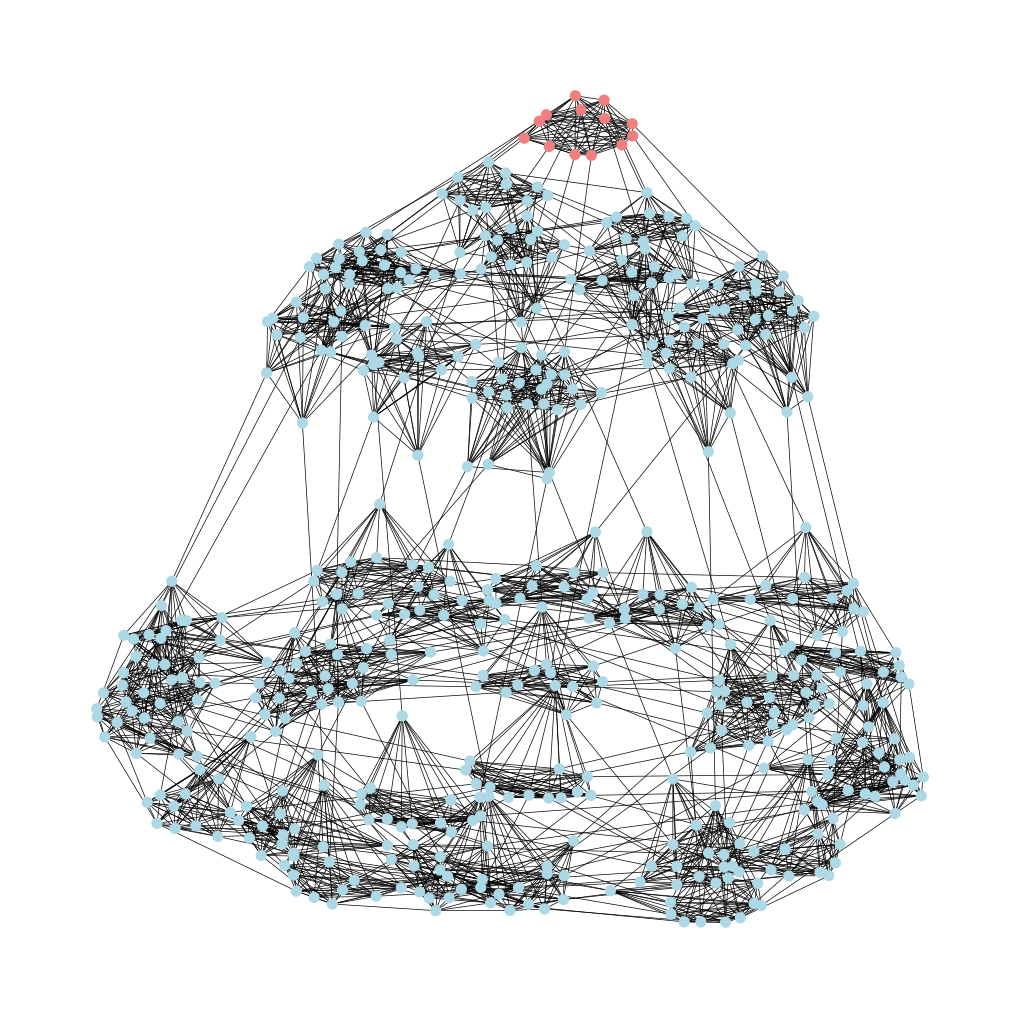

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(g)

nx.draw(g, pos, with_labels=False, node_color=node_colors, node_size=50,
        font_size=2, font_color='black', font_weight='bold',
        width=0.5) 

plt.show()

## Day 24: Crossed Wires

In [101]:
with open('day 24/input.txt') as f:
    lines = f.readlines()

m = len(lines)
m

313

In [102]:
from collections import defaultdict

def set_init_state_and_comp_graph(lines):
    wires = {}
    graph = defaultdict(list)
    reverse_graph = defaultdict(list)
    mode = 0
    for line in lines:
        if line == '\n':
            mode += 1
            continue
        if mode == 0:
            a, b = line[:-1].split(': ')
            wires[a] = int(b)
        elif mode == 1:
            x = line[:-1].split(' ')
            graph[x[0]] += [(x[4], x[1])]
            graph[x[2]] += [(x[4], x[1])]
            reverse_graph[x[4]] += [(x[0], x[1]), (x[2], x[1])]

    return wires, graph, reverse_graph

wires, graph, reverse_graph = set_init_state_and_comp_graph(lines)

In [103]:
def bfs(graph, wires):
    from collections import deque

    init = [(name, v, 'ID') for name, v in wires.items()]
    q = deque(init)
    while q:
        vert, val, op = q.popleft()
        if vert in wires:
            match op:
                case 'ID':
                    wires[vert] = val
                case 'AND':
                    wires[vert] = wires[vert] & val
                case 'OR':
                    wires[vert] = wires[vert] | val
                case 'XOR':
                    wires[vert] = wires[vert] ^ val

            for next_vert, next_op in graph[vert]:
                q.append((next_vert, wires[vert], next_op))
        else:
            wires[vert] = val


bfs(graph, wires)

In [104]:
z = 0
for name in wires:
    if name.startswith('z'):
        z += wires[name] << int(name[1:])

print(f'1. The decimal number that the system of gates and wires outputs on the wires starting with z is {z}')

The decimal number that the system of gates and wires outputs on the wires starting with z is 51107420031718


In [105]:
x, y = 0, 0
for name in wires:
    if name.startswith('x'):
        x += wires[name] << int(name[1:])
    if name.startswith('y'):
        y += wires[name] << int(name[1:])

bin((x + y) ^ z)

'0b111000011000000000111000000000110000000000'

In [106]:
def fetch_candidates(wire, op, levels, level):
    if level == 5:
        return
    levels[level].append((wire, op))
    for prev, op in reverse_graph[wire]:
        fetch_candidates(prev, op, levels, level + 1)
    

In [107]:
for i in range(46):
    levels = defaultdict(list)
    if ((x + y) ^ z) & (1 << i):
        fetch_candidates(('z' + str(i)) if i >= 10 else 'z0' + str(i), '', levels, 0)
        print(levels.values())
        print()


dict_values([[('z10', '')], [('x10', 'AND'), ('y10', 'AND')]])

dict_values([[('z11', '')], [('tdq', 'XOR'), ('tdj', 'XOR')], [('x11', 'XOR'), ('y11', 'XOR'), ('fsf', 'OR'), ('gpr', 'OR')], [('whd', 'AND'), ('htv', 'AND'), ('htv', 'XOR'), ('whd', 'XOR')], [('tnd', 'OR'), ('vjj', 'OR'), ('y10', 'XOR'), ('x10', 'XOR'), ('y10', 'XOR'), ('x10', 'XOR'), ('tnd', 'OR'), ('vjj', 'OR')]])

dict_values([[('z21', '')], [('ptd', 'AND'), ('scj', 'AND')], [('y21', 'XOR'), ('x21', 'XOR'), ('dtg', 'OR'), ('gjs', 'OR')], [('x20', 'AND'), ('y20', 'AND'), ('tff', 'AND'), ('qfd', 'AND')], [('y20', 'XOR'), ('x20', 'XOR'), ('dws', 'OR'), ('fgk', 'OR')]])

dict_values([[('z22', '')], [('hrr', 'XOR'), ('hhc', 'XOR')], [('y22', 'XOR'), ('x22', 'XOR'), ('rhk', 'OR'), ('nks', 'OR')], [('y21', 'AND'), ('x21', 'AND'), ('scj', 'XOR'), ('ptd', 'XOR')], [('dtg', 'OR'), ('gjs', 'OR'), ('y21', 'XOR'), ('x21', 'XOR')]])

dict_values([[('z23', '')], [('nkp', 'XOR'), ('sfc', 'XOR')], [('jvd', 'OR'), ('bbr', 'OR'), ('y23',

In [108]:
print(f'2. Wires we should swap to get the circuit that adds two binary numbers are {''.join([e + ',' for e in sorted('z10,gpr,z21,nks,z33,ghp,cpm,krs'.split(','))])[:-1]}')

Wires we should swap to get the circuit that adds two binary numbers are cpm,ghp,gpr,krs,nks,z10,z21,z33


## Day 25: Code Chronicle

In [109]:
with open('day 25/input.txt') as f:
    lines = f.readlines()

m = len(lines)
m

3999

In [110]:
locks, keys = set(), set()
for i in range(0, m + 1, 8):
    schema = [list(line[:-1]) for line in lines[i:i + 7]]
    if lines[i][:-1] == '#####':
        lock = [0] * 5
        for j, c in enumerate(zip(*schema)):
            lock[j] = c.count('#')

        locks.add(tuple(lock))
    if lines[i][:-1] == '.....':
        key = [0] * 5
        for j, c in enumerate(zip(*schema)):
            key[j] = c.count('#')

        keys.add(tuple(key))


In [ ]:
from itertools import product

fit_pairs = 0
for lock, key in product(locks, keys):
    if all(l + k <= 7 for l, k in zip(lock, key)):
        fit_pairs += 1

print(f'1. The number of unique lock/key pairs fit together is {fit_pairs}')

The number of unique lock/key pairs fit together is 2691
